# COL744 : Machine Learning (Assignment 1)

## Question 4

### Part (a)

* In this part I have implemented GDA. So I have found values of $\phi$ $\mu_0$, $\mu_1$ and $\Sigma$ = $\Sigma_0$ = $\Sigma_1$.

Formula for finding each of these are as below:

$$\phi = \frac{1}{m} \sum\limits_{i=1}^{m}1\{y^{(i)} = 1\}$$
$$\mu_0 = \frac{\Sigma_{i=1}^{m} 1\{y^{(i)} = 0\}x^{(i)}}{\Sigma_{i=1}^{m} 1\{y^{(i)} = 0\}}$$
$$\mu_1 = \frac{\Sigma_{i=1}^{m} 1\{y^{(i)} = 1\}x^{(i)}}{\Sigma_{i=1}^{m} 1\{y^{(i)} = 1\}}$$
$$\Sigma = \frac{1}{m} \sum\limits_{i=1}^{m} (x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^T$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
X_unnormalized=np.genfromtxt('./ass1_data/data/q4/q4x.dat')
categories, Y = np.unique(np.genfromtxt('./ass1_data/data/q4/q4y.dat', dtype=str), return_inverse=True)

X = (X_unnormalized - X_unnormalized.mean(axis=0))/X_unnormalized.std(axis=0)


In [3]:
def findParameters(X,Y):
    pos_X = X[np.where(Y==1)] #Getting datapoints with positive label
    neg_X = X[np.where(Y==0)] #Getting datapoints with negative label
    (m,n) = X.shape
    phi = pos_X.shape[0]/m
    
    mu_0 = np.sum(neg_X, axis=0)/neg_X.shape[0]
    mu_1 = np.sum(pos_X, axis=0)/pos_X.shape[0]
    
    Sigma = (np.dot((neg_X - mu_0).T, (neg_X - mu_0)) + np.dot((pos_X - mu_1).T, (pos_X - mu_1)))/m
    return (phi, mu_0, mu_1, Sigma)

In [4]:
(phi, mu_0, mu_1, Sigma) = findParameters(X,Y)

* Reporting values of $\mu_0, \mu_1$ and $\Sigma$

In [5]:
print('Value of mu_0 : %s\n'%(mu_0))
print('Value of mu_1 : %s\n'%(mu_1))
print('Value of Sigma : \n%s'%(Sigma))

Value of mu_0 : [-0.75529433  0.68509431]

Value of mu_1 : [ 0.75529433 -0.68509431]

Value of Sigma : 
[[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


### Part (b) : Plotting Datapoints

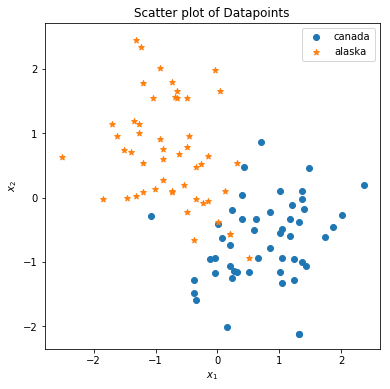

In [6]:
fig = plt.figure(figsize=(6,6))

pos_X = X[np.where(Y==1)] #Getting datapoints with positive label
neg_X = X[np.where(Y==0)] #Getting datapoints with negative label
plt.scatter(pos_X[:,0], pos_X[:,1], marker='o', label='canada')
plt.scatter(neg_X[:,0], neg_X[:,1], marker='*', label='alaska')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Scatter plot of Datapoints')
plt.show()

### Part (c) : Plotting linear decision boundary

Equation for decision boundary when $\Sigma = \Sigma_1 = \Sigma_2$ is linear in terms of X. The equation is as follows.

$$\log(\frac{1-\phi}{\phi}) + \frac{1}{2}(\mu_1^T\Sigma^{-1}\mu_1 - \mu_0^T\Sigma^{-1}\mu_0) + (\mu_0^T\Sigma^{-1} - \mu_1^T\Sigma^{-1})x = 0$$

Therefore, $$\theta_0 = \log(\frac{1-\phi}{\phi}) + \frac{1}{2}(\mu_1^T\Sigma^{-1}\mu_1 - \mu_0^T\Sigma^{-1}\mu_0)$$
and $$\theta = \mu_0^T\Sigma^{-1} - \mu_1^T\Sigma^{-1}$$

So Now computing $\theta$ and plotting dicision surface over the datapoints. 

In [7]:
def findTheta(phi, mu_0, mu_1, Sigma):
    Sigma_inv = np.linalg.inv(Sigma)
    theta_0 = np.log((1-phi)/phi) + (1/2)*(mu_1.T.dot(Sigma_inv).dot(mu_1) - mu_0.T.dot(Sigma_inv).dot(mu_0))
    theta = (mu_0.T - mu_1.T).dot(Sigma_inv)
    return theta_0, theta

In [8]:
(theta_0, theta) = findTheta(phi, mu_0, mu_1, Sigma)

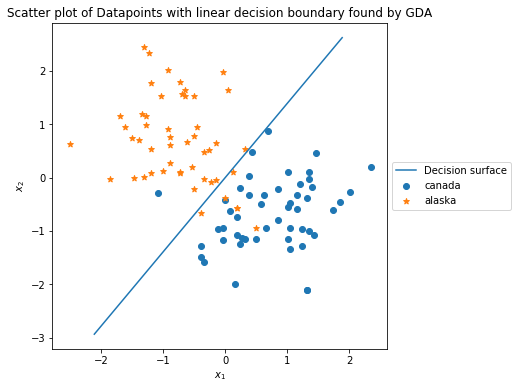

In [9]:
fig = plt.figure(figsize=(6,6))

pos_X = X[np.where(Y==1)] #Getting datapoints with positive label
neg_X = X[np.where(Y==0)] #Getting datapoints with negative label
plt.scatter(pos_X[:,0], pos_X[:,1], marker='o', label='canada')
plt.scatter(neg_X[:,0], neg_X[:,1], marker='*', label='alaska')

X_line = np.arange(X[:,1].min(), X[:,1].max())
Y_line = -1*(1/theta[1])*((theta[0]*X_line)+theta_0)
plt.plot(X_line, Y_line, label='Decision surface')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Scatter plot of Datapoints with linear decision boundary found by GDA')
plt.show()

### Part (d) : finding $\mu_0, \mu_1, \Sigma_0, \Sigma_1$

* Till now I have assumed that $\Sigma = \Sigma_0 = \Sigma_1$, but now we will find $\Sigma_0$ and $\Sigma_1$ separately using these equations.
$$\Sigma_0 = \frac{\sum\limits_{i=1}^{m}1\{y^{(i)} = 0\}(x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^T}{\sum\limits_{i=1}^{m}1\{y^{(i)} = 0\}},$$
$$\Sigma_1 = \frac{\sum\limits_{i=1}^{m}1\{y^{(i)} = 1\}(x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^T}{\sum\limits_{i=1}^{m}1\{y^{(i)} = 1\}}$$

In [10]:
def findParameters2(X,Y):
    pos_X = X[np.where(Y==1)] #Getting datapoints with positive label
    neg_X = X[np.where(Y==0)] #Getting datapoints with negative label
    (m,n) = X.shape
    phi = pos_X.shape[0]/m
    
    mu_0 = np.sum(neg_X, axis=0)/neg_X.shape[0]
    mu_1 = np.sum(pos_X, axis=0)/pos_X.shape[0]
    
    x_mu0 = neg_X - mu_0
    x_mu1 = pos_X - mu_1
    Sigma0 = x_mu0.T.dot(x_mu0)/neg_X.shape[0]
    Sigma1 = x_mu1.T.dot(x_mu1)/neg_X.shape[0]

    return (phi, mu_0, mu_1, Sigma0, Sigma1)

In [11]:
(phi, mu_0, mu_1, Sigma0, Sigma1) = findParameters2(X,Y)

* Reporting values of $\mu_0, \mu_1, \Sigma_0$ and $\Sigma_1$

In [12]:
print('Value of mu_0 : %s\n'%(mu_0))
print('Value of mu_1 : %s\n'%(mu_1))
print('Value of Sigma0 : \n%s\n'%(Sigma0))
print('Value of Sigma1 : \n%s'%(Sigma1))

Value of mu_0 : [-0.75529433  0.68509431]

Value of mu_1 : [ 0.75529433 -0.68509431]

Value of Sigma0 : 
[[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]

Value of Sigma1 : 
[[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]


### Part (e) : Plotting non-linear decision boundary 

* Here as we have computed $\Sigma_0$ and $\Sigma_1$ separately, we get a non-linear decision boundary. Here is the equation for the same.

$$\log(\frac{(1-\phi)|\Sigma_1|^{1/2}}{\phi|\Sigma_0|^{1/2}}) + \frac{1}{2}(\mu_1^T\Sigma_1^{-1}\mu_1 - \mu_0^T\Sigma_0^{-1}\mu_0) + \frac{1}{2}x^T(\Sigma_1^{-1} - \Sigma_0^{-1})x + (\mu_0^T\Sigma_0^{-1} - \mu_1^T\Sigma_1^{-1})x = 0$$



So this decision boundary will turn out to be of form $$ax_1^2 + bx_2^2 + cx_1x_2 + dx_1 + ex_2 + f = 0$$ where,


$a = (\frac{1}{2}(\Sigma_1^{-1} - \Sigma_0^{-1}))[1][1]$


$b = (\frac{1}{2}(\Sigma_1^{-1} - \Sigma_0^{-1}))[2][2]$


$c = (\frac{1}{2}(\Sigma_1^{-1} - \Sigma_0^{-1}))[1][2] + (\frac{1}{2}(\Sigma_1^{-1} - \Sigma_0^{-1}))[2][1]$


$d = (\mu_1^T\Sigma_1^{-1} - \mu_0^T\Sigma_0^{-1})[1]$


$e = (\mu_1^T\Sigma_1^{-1} - \mu_0^T\Sigma_0^{-1})[2]$


$f = \log(\frac{(1-\phi)|\Sigma_1|^{1/2}}{\phi|\Sigma_0|^{1/2}}) + \frac{1}{2}(\mu_1^T\Sigma_1^{-1}\mu_1 - \mu_0^T\Sigma_0^{-1}\mu_0)$
<br><br>
* Here the decision surface we got is a hyperbola as sign of a and b is different.

In [13]:
def findCoeffs(phi, mu_0, mu_1, Sigma0, Sigma1):
    Sigma0_inv = np.linalg.inv(Sigma0)
    Sigma1_inv = np.linalg.inv(Sigma1)    
    mu0_T = mu_0.T
    mu1_T = mu_1.T    
    
    x_2_coeff = (1/2)*(Sigma1_inv - Sigma0_inv)
    a=x_2_coeff[0][0]
    b=x_2_coeff[1][1]
    c=x_2_coeff[0][1] + x_2_coeff[1][0]
    
    x_1_coeff = (mu0_T.dot(Sigma0_inv) - mu1_T.dot(Sigma1_inv))
    d=x_1_coeff[0]
    e=x_1_coeff[1]

    Sigma0_det = np.linalg.det(Sigma0)
    Sigma1_det = np.linalg.det(Sigma1)
    f = np.log(((1-phi)*math.sqrt(Sigma1_det))/(phi*math.sqrt(Sigma0_det))) + (1/2)*(mu1_T.dot(Sigma1_inv).dot(mu_1) - mu0_T.dot(Sigma0_inv).dot(mu_0))
    return (a,b,c,d,e,f)

In [14]:
coeffs = findCoeffs(phi, mu_0, mu_1, Sigma0, Sigma1)

In [15]:
def f(x,y,coeffs):
    a=coeffs[0]
    b=coeffs[1]
    c=coeffs[2]
    d=coeffs[3]
    e=coeffs[4]
    f=coeffs[5]
    return a*(x**2) + b*(y**2) + c*x*y + d*x + e*y + f

def fcontour(f, xrange, yrange, coeffs=(0,0,0,0,0,0), **kwargs):
    """
    Draw the curve f(x,y) = 0 over the specified range.
    Arguments:
    f --- the function defining the curve
    coeffs --- co-efficients that we will pass to our function f defined in this question
    """
    xs = np.linspace(xrange[0], xrange[1])
    ys = np.linspace(yrange[0], yrange[1])
    fs = [[f(x,y, coeffs) for x in xs] for y in ys]
    plt.contour(xs, ys, fs, [0], **kwargs)
    plt.axis('scaled')


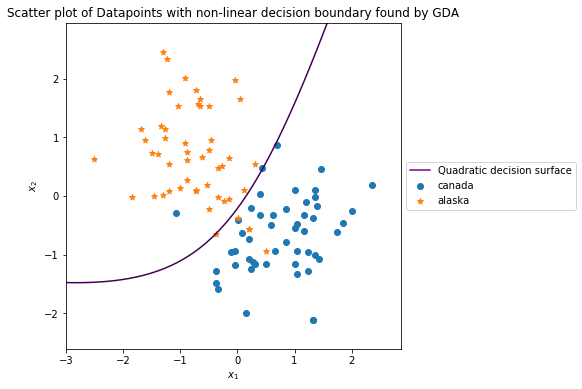

In [16]:
fig = plt.figure(figsize=(6,6))
pos_X = X[np.where(Y==1)] #Getting datapoints with positive label
neg_X = X[np.where(Y==0)] #Getting datapoints with negative label
plt.scatter(pos_X[:,0], pos_X[:,1], marker='o', label='canada')
plt.scatter(neg_X[:,0], neg_X[:,1], marker='*', label='alaska')

xs = np.linspace(-3, 3)
ys = np.linspace(-3, 3)
fs = [[f(x,y, coeffs) for x in xs] for y in ys]
cs = plt.contour(xs, ys, fs, [0])
plt.plot([],[],c='purple',label='Quadratic decision surface')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim((X[:,0].min()-0.5, X[:,0].max()+0.5))
plt.ylim((X[:,1].min()-0.5, X[:,1].max()+0.5))
plt.title('Scatter plot of Datapoints with non-linear decision boundary found by GDA')
plt.show()

### Part (f) : Comparing both decision boundaries

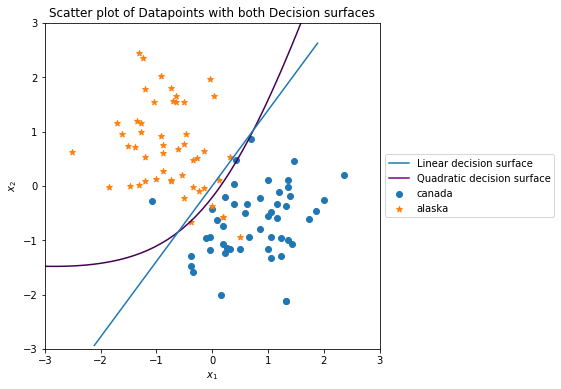

In [17]:
fig = plt.figure(figsize=(6,6))

pos_X = X[np.where(Y==1)] #Getting datapoints with positive label
neg_X = X[np.where(Y==0)] #Getting datapoints with negative label
plt.scatter(pos_X[:,0], pos_X[:,1], marker='o', label='canada')
plt.scatter(neg_X[:,0], neg_X[:,1], marker='*', label='alaska')

X_line = np.arange(X[:,1].min(), X[:,1].max())
Y_line = -1*(1/theta[1])*((theta[0]*X_line)+theta_0)
plt.plot(X_line, Y_line, label='Linear decision surface')
plt.plot([],[],c='purple',label='Quadratic decision surface')
xs = np.linspace(-3, 3)
ys = np.linspace(-3, 3)
fs = [[f(x,y, coeffs) for x in xs] for y in ys]
plt.contour(xs, ys, fs, [0])


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Scatter plot of Datapoints with both Decision surfaces')
plt.show()

#### Observations :

* Here we can see that non-linear decision surface classifies data better than linear boundary. We can see that for the points close to the decision surface.  